In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import seaborn as sns
import plotly.plotly as py
import plotly.tools as tls
from ipyleaflet import Map
%matplotlib inline
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [2]:
pwd

'/Users/stephaniechanshomefolder/Desktop/Opioid-Analysis-'

In [3]:
prescription_df = pd.read_csv('/Users/stephaniechanshomefolder/Desktop/Opioid-Analysis-/Prescription_Rate.csv')
prescription_df.head()

,State,State ABBR,2006 Prescribing Rate,2007 Prescribing Rate,2008 Prescribing Rate,2009 Prescribing Rate,2010 Prescribing Rate,2011 Prescribing Rate,2012 Prescribing Rate,2013 Prescribing Rate,2014 Prescribing Rate,2015 Prescribing Rate,2016 Prescribing Rate
0,Alabama,AL,115.6,120.3,126.1,131.6,134.3,136.6,143.8,142.4,135.2,125.0,121.0
1,Alaska,AK,63.4,66.6,68.5,67.3,68.4,68.0,66.8,63.7,62.7,60.8,58.9
2,Arizona,AZ,74.3,77.8,80.9,84.2,88.5,88.6,85.3,80.4,79.7,75.5,70.2
3,Arkansas,AR,98.3,108.2,112.1,116.0,120.8,115.2,121.8,120.9,123.2,117.2,114.6
4,California,CA,51.0,53.6,55.1,55.6,55.8,55.9,56.4,54.4,52.7,47.7,44.8


In [4]:
prescription_df.rename(columns={'2009 Prescribing Rate': '2009', 
                                '2010 Prescribing Rate': '2010',
                                '2011 Prescribing Rate': '2011',
                                '2012 Prescribing Rate': '2012',
                                '2013 Prescribing Rate': '2013',
                                '2014 Prescribing Rate': '2014',
                                '2015 Prescribing Rate': '2015',
                                '2016 Prescribing Rate': '2016'
                               }, 
                       inplace=True)
newdf=prescription_df.drop(['State ABBR', 
                      '2006 Prescribing Rate', 
                      '2007 Prescribing Rate', 
                      '2008 Prescribing Rate'],
                      axis=1)
# newdf.set_index('State')
newdf

,State,2009,2010,2011,2012,2013,2014,2015,2016
0,Alabama,131.6,134.3,136.6,143.8,142.4,135.2,125.0,121.0
1,Alaska,67.3,68.4,68.0,66.8,63.7,62.7,60.8,58.9
2,Arizona,84.2,88.5,88.6,85.3,80.4,79.7,75.5,70.2
3,Arkansas,116.0,120.8,115.2,121.8,120.9,123.2,117.2,114.6
4,California,55.6,55.8,55.9,56.4,54.4,52.7,47.7,44.8
5,Colorado,69.8,72.0,73.0,73.5,71.2,69.6,65.1,59.8
6,Connecticut,68.1,68.6,69.1,69.3,67.4,66.0,62.3,55.9
7,Delaware,97.5,101.1,99.7,94.0,92.7,91.0,84.4,79.2
8,District of Columbia,34.4,37.1,39.8,40.3,41.1,40.1,35.7,32.5
9,Florida,86.3,87.6,83.5,75.9,73.5,71.4,67.1,66.6


# Ave. of Opioid Prescribing Rate per 100 people in U.S. 2009-2016

In [5]:
totalus=newdf.mean(axis=0).reset_index()
totalus

totalaveus=pd.DataFrame({'Year':totalus['index'],
                         'U.S. Ave. per Year':totalus[0]})
totalaveus

,U.S. Ave. per Year,Year
0,83.660784,2009
1,85.558824,2010
2,85.409804,2011
3,86.184314,2012
4,83.096078,2013
5,80.688235,2014
6,75.637255,2015
7,70.817647,2016


Text(0.5,1,'Average Rate of Opioid Prescriptions in U.S. (2009-2016)')

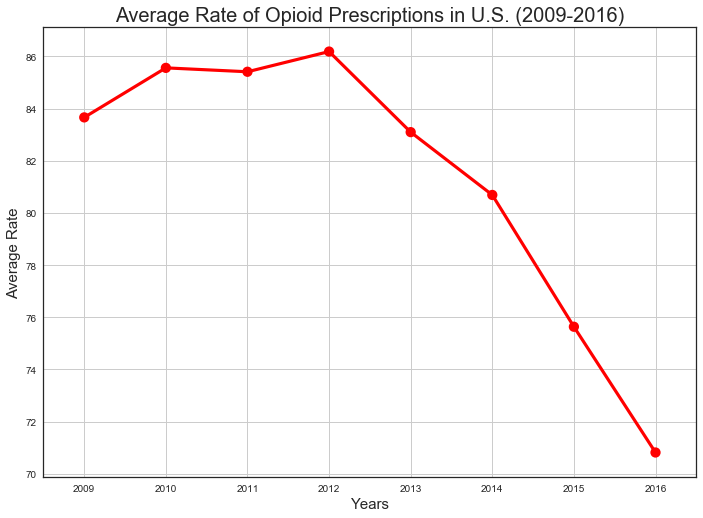

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)
sns.pointplot(x="Year",
            y="U.S. Ave. per Year",
            data=totalaveus,
            color="red")
plt.grid(linestyle="solid")
plt.xlabel("Years", size = 15)
plt.ylabel("Average Rate", size = 15)
plt.title ("Average Rate of Opioid Prescriptions in U.S. (2009-2016)", size=20)

# Top 10 States Highest Opioid Prescribing Rate per 100 people in U.S. 2009-2016

In [30]:
statemean=pd.DataFrame({'State': newdf['State'],
                       'Ave. Prescribing Rate': newdf.mean(axis=1)}
                      )
top=statemean.sort_values(by='Ave. Prescribing Rate', ascending=False)
z=top.head(10)
q=top.tail(10)

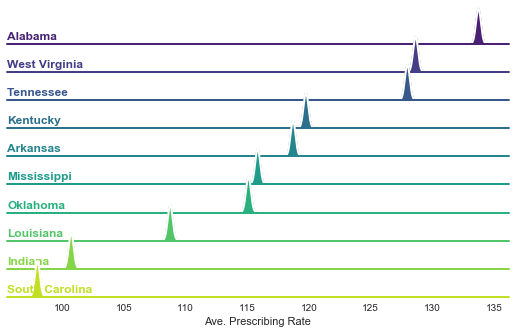

In [25]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(z, row="State", hue="State", aspect=15, size=.5, palette='viridis')

# Draw the densities in a few steps
g.map(sns.kdeplot, "Ave. Prescribing Rate", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "Ave. Prescribing Rate", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# # Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Ave. Prescribing Rate")

# # Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

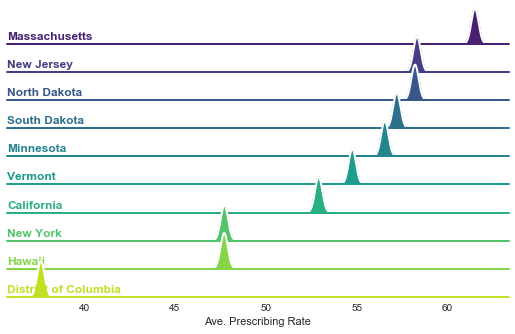

In [31]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(q, row="State", hue="State", aspect=15, size=.5, palette='viridis')

# Draw the densities in a few steps
g.map(sns.kdeplot, "Ave. Prescribing Rate", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "Ave. Prescribing Rate", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# # Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Ave. Prescribing Rate")

# # Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

# Top 10 States with Highest Opioid Prescribing Rate per 100 people in U.S. from 2009-2016

In [11]:
#sum up each row, and create a new column that contains the total
sumpre=newdf.sum(axis=1) 

totalprescription=pd.DataFrame({'State':newdf['State'],
                                'Total Prescriptions':sumpre})

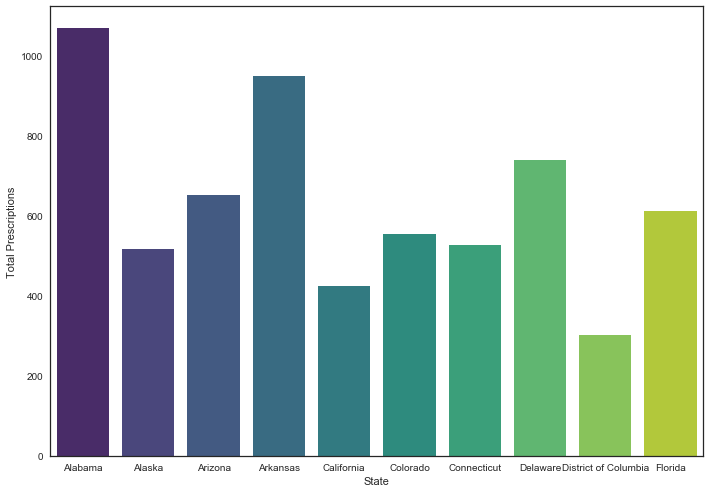

In [12]:
totalprescription.sort_values(by='Total Prescriptions',ascending=False)
totals=totalprescription.head(10)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x='State', y='Total Prescriptions', data=totals, palette="viridis")